In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [3]:
lr = LogisticRegression()
svc = LinearSVC(C = 1.0)
rfc = RandomForestClassifier(n_estimators=100)

In [4]:
prima = pd.read_csv("https://raw.githubusercontent.com/deister/AI/master/resources/pima_diabetes.csv")


In [5]:
prima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
prima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
prima.shape

(768, 9)

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(prima, test_size = 0.2)
print(train.shape)
print(test.shape)

(614, 9)
(154, 9)


In [10]:
train.iloc[:,:8].head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
572,3,111,58,31,44,29.5,0.430,22
261,3,141,0,0,0,30.0,0.761,27
760,2,88,58,26,16,28.4,0.766,22
363,4,146,78,0,0,38.5,0.520,67
164,0,131,88,0,0,31.6,0.743,32


In [11]:
train_feat = train.iloc[:,:8]
train_targ = train["Outcome"]

In [12]:
train_feat.shape

(614, 8)

In [13]:
type(train_targ)

pandas.core.series.Series

In [14]:
type(train[["Outcome"]])

pandas.core.frame.DataFrame

In [15]:
train[["Outcome"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 572 to 407
Data columns (total 1 columns):
Outcome    614 non-null int64
dtypes: int64(1)
memory usage: 9.6 KB


In [16]:
lr.fit(train_feat, train_targ)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
lr.score(train_feat, train_targ)

0.7671009771986971

In [18]:
lr.coef_

array([[ 1.00864956e-01,  2.63377597e-02, -1.50510779e-02,
         1.15714343e-03, -3.75747138e-04,  5.25813878e-02,
         5.59309001e-01,  1.04806542e-02]])

In [19]:
np.transpose(lr.coef_)

array([[ 1.00864956e-01],
       [ 2.63377597e-02],
       [-1.50510779e-02],
       [ 1.15714343e-03],
       [-3.75747138e-04],
       [ 5.25813878e-02],
       [ 5.59309001e-01],
       [ 1.04806542e-02]])

In [20]:
lr.predict(train_feat)

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

model = RandomForestRegressor(100, oob_score = True, n_jobs = -1, random_state = 42)
model.fit(train_feat, train_targ)

print("C-stat: ", roc_auc_score(train_targ, model.oob_prediction_))

C-stat:  0.8109317765567764


In [23]:
from sklearn.model_selection import cross_val_score

model_scores = cross_val_score(model, train_feat, train_targ, cv=5)
model_scores.mean()

0.2917727934297333

In [39]:
model.feature_importances_

array([0.05637907, 0.33771645, 0.08492238, 0.05334736, 0.04975704,
       0.15756926, 0.12715337, 0.13315506])

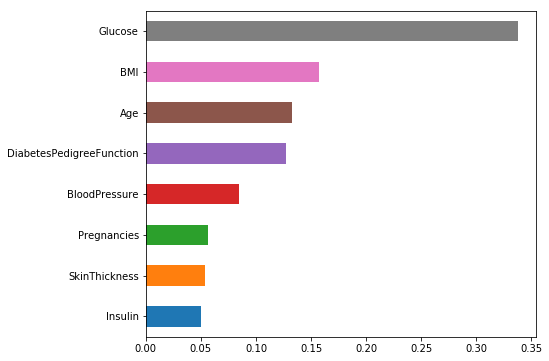

In [40]:
feature_importances = pd.Series(model.feature_importances_, index = train_feat.columns)
feature_importances.sort_values(ascending = True, inplace = True)
feature_importances.plot(kind = "barh", figsize = (7, 6))

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


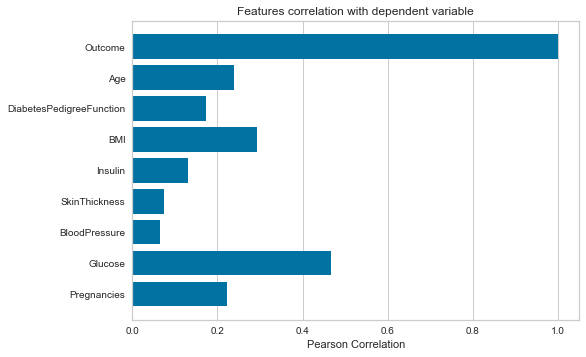

In [76]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

import pandas as pd

prima = pd.read_csv("diabetes.csv")

X, y = prima, prima['Outcome']

feature_names = np.array(prima.columns)
print(feature_names)

visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(X, y)
visualizer.poof()


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

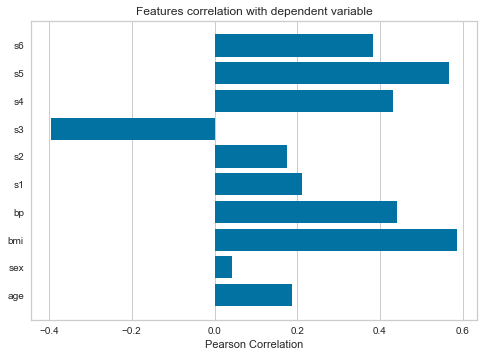

In [93]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

# Load the regression data set

data = datasets.load_diabetes(return_X_y=False)
print(data)
#data = datasets.load_diabetes()

X, y = data['data'], data['target']
feature_names = np.array(data['feature_names'])

visualizer = FeatureCorrelation(labels=feature_names)
visualizer.fit(X, y)
visualizer.poof()